# Clinical Trial g2p edge inference
These edges were minded from xml records on https://clinicaltrials.gov/. These were downloaded and processed on fiji in /scratch/Shares/layer/workspace/michael_sandbox/ClinicalTrialBOCC.
The processes involved searching each record for gene symbols and mesh_terms. If a record contained atleast one gene and one mesh term it was saved. The resulting saved record is what is being parsed here.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

def remove_borders(ax, top=False, bottom=True, left=True, right=False):
    ax.spines['top'].set_visible(top)
    ax.spines['bottom'].set_visible(bottom)
    ax.spines['left'].set_visible(left)
    ax.spines['right'].set_visible(right)

In [5]:
df = pd.read_csv('../Resources/ClinicalTrialCombinedResults.tsv',sep='\t',header=None)
df.columns = ['gene','hpo','overall_status','org_study_id']
print(df.columns)
print(df.shape)
print(df)

Index(['gene', 'hpo', 'overall_status', 'org_study_id'], dtype='object')
(3240233, 4)
        gene         hpo      overall_status          org_study_id
0        CTH  HP:0008258           Completed  NCRR-M01RR01070-0506
1        CTH  HP:0000840           Completed  NCRR-M01RR01070-0506
2        MET  HP:0000545           Completed                 NEI-9
3        MET  HP:0000545           Completed                 NEI-9
4        MET  HP:0000545           Completed                 NEI-9
...      ...         ...                 ...                   ...
3240228  MPL  HP:0012743  Not yet recruiting              H22-0161
3240229  GPT  HP:0100843          Recruiting               22.0676
3240230  RAN  HP:0100843          Recruiting               22.0676
3240231  CRP  HP:0100787  Not yet recruiting              C3441057
3240232  TTN  HP:0100787  Not yet recruiting              C3441057

[3240233 rows x 4 columns]


In [13]:
# what portion of studies are complete?
statuses = list(df['overall_status'].unique())
s_counts = [sum(df['overall_status'] == x) for x in statuses]
status_counts = pd.DataFrame({'status':statuses,'counts':s_counts})
sc_df = status_counts.sort_values('counts',ascending=False)
# g2p pairs per study - distribution

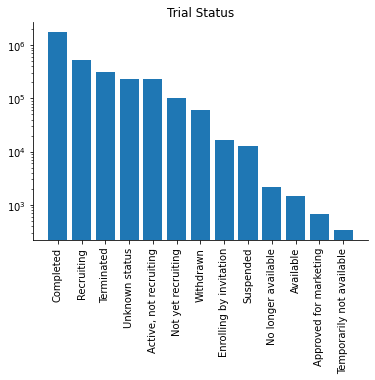

In [19]:
fig, ax = plt.subplots()
ax.bar(x=sc_df['status'],height=sc_df['counts'])
plt.xticks(rotation='vertical')
ax.set_yscale('log')
remove_borders(ax)
ax.set_title('Trial Status')
plt.show()